In [86]:
#to read the data
import pandas as pd
data=pd.read_excel("Sample Survey.xlsx",sheet_name="Data")
survey = pd.DataFrame(data, columns= ['response_id','collection_date','urban_rural','education','income','Vote_Now','Past_Vote','CM_satisfaction','MLA_satisfaction','age','gender','assembly_no','category','weight'])

In [87]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [88]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [89]:
x=survey.groupby('collection_date').size()
print(x)

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
dtype: int64


In [90]:
#data=pd.read_excel("Sample Survey.xlsx",sheet_name="Data")
#survey =pd.DataFrame(data, columns= ['response_id','collection_date','urban_rural','education','income','Vote_Now','Past_Vote','CM_satisfaction','MLA_satisfaction','age','gender','assembly_no','category','weight'])
survey['age'] = survey['age'].replace(['24ko'],'24')#preprocessing data
survey['age'] = survey['age'].astype(int)
result = len(survey.loc[survey['age'] < 45])
print("less than 45 age data:", result)

less than 45 age data: 6399


In [91]:
#import pandas as pd
#data = pd.read_excel ('Sample Survey.xlsx',sheet_name='Data',index_col='age')
age_column = pd.DataFrame(data, columns= ['response_id','age'])
age_column.loc[ survey.age >= 18, 'age_group' ] = '18-25'
age_column.loc[ survey.age >= 25, 'age_group' ] = '25-40'
age_column.loc[ survey.age >= 40, 'age_group' ] = '40-55'
age_column.loc[ survey.age >= 55, 'age_group' ] = '55+'

age_column

,response_id,age,age_group
0,1,26,25-40
1,2,34,25-40
2,3,25,25-40
3,4,36,25-40
4,5,22,18-25
...,...,...,...
6862,6863,25,25-40
6863,6864,30,25-40
6864,6865,20,18-25
6865,6866,23,18-25


In [92]:
samples = age_column.groupby('age_group').size()
print("max sample", max(samples))
samples

max sample 3844


age_group
18-25    2094
25-40    3844
40-55     801
55+       128
dtype: int64

In [93]:
result = survey.loc[(survey['Vote_Now'] =='RJD') & (survey['Past_Vote'] == 'RJD')]
print("total number of rows:", len(result))

total number of rows: 811


In [94]:
date = (survey.collection_date.unique())
date_num = survey.groupby('collection_date').size()
print("total_number of dates:", len(date))

num1 = survey.loc[(survey['collection_date'] == date[0]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num1)/date_num[0]))

num2 = survey.loc[(survey['collection_date'] == date[1]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num2)/date_num[1]))

num3 = survey.loc[(survey['collection_date'] == date[2]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num3)/date_num[2]))

num4 = survey.loc[(survey['collection_date'] == date[3]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num4)/date_num[3]))

num5 = survey.loc[(survey['collection_date'] == date[4]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num5)/date_num[4]))

num6 = survey.loc[(survey['collection_date'] == date[5]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num6)/date_num[5]))

num7 = survey.loc[(survey['collection_date'] == date[6]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num7)/date_num[6]))

num8 = survey.loc[(survey['collection_date'] == date[7]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num8)/date_num[7]))

num9 = survey.loc[(survey['collection_date'] == date[8]) & (survey['CM_satisfaction'] =='Fully Satisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num9)/date_num[8]))


total_number of dates: 9
Satisfaction ratio for 2020-08-24 :  0.09871534820824882
Satisfaction ratio for 2020-08-24 :  0.09519038076152304
Satisfaction ratio for 2020-08-24 :  0.09866220735785954
Satisfaction ratio for 2020-08-24 :  0.081203007518797
Satisfaction ratio for 2020-08-24 :  0.12089356110381078
Satisfaction ratio for 2020-08-24 :  0.11774193548387096
Satisfaction ratio for 2020-08-24 :  0.11168384879725086
Satisfaction ratio for 2020-08-24 :  0.11131059245960502
Satisfaction ratio for 2020-08-24 :  0.12355848434925865


total_number of dates: 9
Satisfaction ratio for 2020-08-24 :  0.5997295469912103
Satisfaction ratio for 2020-08-24 :  0.6312625250501002
Satisfaction ratio for 2020-08-24 :  0.35370741482965934
Satisfaction ratio for 2020-08-24 :  0.606015037593985
Satisfaction ratio for 2020-08-24 :  0.607095926412615
Satisfaction ratio for 2020-08-24 :  0.5645161290322581
Satisfaction ratio for 2020-08-24 :  0.6202749140893471
Satisfaction ratio for 2020-08-24 :  0.5763016157989228
Satisfaction ratio for 2020-08-24 :  0.6342668863261944


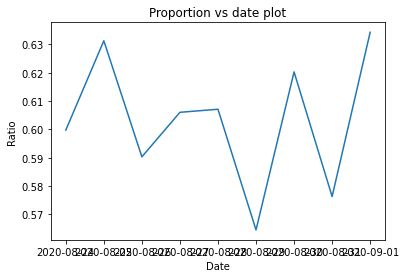

In [95]:
date = (survey.collection_date.unique())
date_num = survey.groupby('collection_date').size()
print("total_number of dates:", len(date))
ratio = []
num1 = survey.loc[(survey['collection_date'] == date[0]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num1)/date_num[0]))
ratio.append((len(num1)/date_num[0]))

num2 = survey.loc[(survey['collection_date'] == date[1]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num2)/date_num[1]))
ratio.append((len(num2)/date_num[1]))

num3 = survey.loc[(survey['collection_date'] == date[2]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num3)/date_num[1]))
ratio.append((len(num3)/date_num[2]))

num4 = survey.loc[(survey['collection_date'] == date[3]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num4)/date_num[3]))
ratio.append((len(num4)/date_num[3]))

num5 = survey.loc[(survey['collection_date'] == date[4]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num5)/date_num[4]))
ratio.append((len(num5)/date_num[4]))

num6 = survey.loc[(survey['collection_date'] == date[5]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num6)/date_num[5]))
ratio.append((len(num6)/date_num[5]))

num7 = survey.loc[(survey['collection_date'] == date[6]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num7)/date_num[6]))
ratio.append((len(num7)/date_num[6]))

num8 = survey.loc[(survey['collection_date'] == date[7]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num8)/date_num[7]))
ratio.append((len(num8)/date_num[7]))

num9 = survey.loc[(survey['collection_date'] == date[8]) & (survey['MLA_satisfaction'] =='Fully Dissatisfied')]
print("Satisfaction ratio for 2020-08-24 : ", (len(num9)/date_num[8]))
ratio.append((len(num9)/date_num[8]))

#################plotting##################
import matplotlib.pyplot as plt
import numpy as np
ratio = np.array(ratio)

plt.plot(date, ratio)
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.title('Proportion vs date plot')
plt.show()

In [96]:
vote = survey[['Vote_Now', 'Past_Vote']]
vote.pivot_table(index='Vote_Now', columns='Past_Vote', aggfunc=len, fill_value=0)

Past_Vote,BJP,BSP,Did not vote,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,RJD,RLSP,VIP
Vote_Now,,,,,,,,,,,,,,
AAP,7,0,8,2,0,0,6,0,0,0,1,3,0,0
AIMIM,1,1,5,0,6,0,10,0,1,1,5,7,0,0
BJP,1630,2,231,25,6,4,254,76,2,29,45,46,17,0
BSP,3,5,2,0,0,0,2,1,0,1,1,0,0,0
HAM,5,0,1,1,0,0,2,0,0,0,1,1,0,0
INC,42,1,22,0,57,0,45,4,1,9,4,31,0,0
JAP(L),101,0,41,3,10,35,72,3,0,7,7,31,3,0
JD(U),110,0,69,2,9,0,279,6,0,7,4,39,0,1
LJP,44,0,10,2,0,0,29,9,0,3,1,4,0,0


In [97]:
vote = survey[['Vote_Now', 'weight']]
table = pd.pivot_table(data=vote,index=['Vote_Now'], aggfunc=sum, fill_value=0)
table

,weight
Vote_Now,
AAP,45.620236
AIMIM,96.410323
BJP,1546.903568
BSP,50.015771
HAM,19.423146
INC,429.904844
JAP(L),327.226062
JD(U),722.230271
LJP,133.091786


In [74]:
age_group = {}
group_names = ['[0-10]','[11-20]','[21-30]','[31-40]','[41-50],[51-60],[61-70],[71-80],[81-90],[91-100]']
bins = ([0,10,20,30,40,50,60,70,80,90,100])
survey['age'] = survey['age'].replace(['24ko'],'24')#preprocessing data
survey['age'] = survey['age'].astype(int)
age_group["age_bin"] = pd.cut(survey["age"], bins=[10,20,30,40,50,60,70])
age_data = pd.DataFrame(age_group)
agg_age = age_data.groupby('age_bin').size()
age_grouping = pd.DataFrame(list(zip(agg_age.index, agg_age)), columns = ['age_group', 'sample_count'])
print(age_grouping)


  age_group  sample_count
0  (10, 20]           624
1  (20, 30]          3892
2  (30, 40]          1599
3  (40, 50]           554
4  (50, 60]           138
5  (60, 70]            53


In [79]:
survey['age_group'] = age_data['age_group']
data = survey[['Vote_Now', 'age_group']]
result = (data.loc[data['Vote_Now'] == 'JD(U)'])

jdu_sample = result.groupby('age_group').size()
jdu_data = pd.DataFrame(list(zip(jdu_sample.index, jdu_sample)), columns = ['age_group', 'sample_count'])
print(jdu_data)

  age_group  sample_count
0  (10, 20]            56
1  (20, 30]           286
2  (30, 40]           119
3  (40, 50]            46
4  (50, 60]            13
5  (60, 70]             6


In [80]:
merge_data = pd.merge(age_grouping, jdu_data, left_on='age_group', right_on='age_group')
merge_data

,age_group,sample_count_x,sample_count_y
0,"(10, 20]",624,56
1,"(20, 30]",3892,286
2,"(30, 40]",1599,119
3,"(40, 50]",554,46
4,"(50, 60]",138,13
5,"(60, 70]",53,6
